In [ ]:
import re
import nltk
import pandas as pd
import numpy as np
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#**Load Data**

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Ali Tuasikal.txt to Ali Tuasikal (1).txt


In [ ]:
with open('Ali Tuasikal.txt', 'r') as file:
    # Membaca seluruh isi file sebagai string
    content = file.read()

    # Membaca setiap baris dan menyimpannya dalam list
    lines = file.readlines()

In [ ]:
print(content)

19/07/21 19.32 - Pesan dan panggilan terenkripsi secara end-to-end. Tidak seorang pun di luar chat ini, termasuk WhatsApp, yang dapat membaca atau mendengarkannya. Ketuk untuk info selengkapnya.
19/07/21 19.32 - Ali Tuasikal: Mual liatnya 🤮
19/07/21 19.33 - Irma Telkom: Seriusss eee
19/07/21 19.34 - Ali Tuasikal: Geli wehhhhh
19/07/21 19.34 - Irma Telkom: Awkwkwkw
19/07/21 20.07 - Ali Tuasikal: Apalah 🥲
19/07/21 20.07 - Ali Tuasikal: Cuek 🥲
19/07/21 20.08 - Irma Telkom: Bercanda ituu beb 😂
19/07/21 20.08 - Irma Telkom: Cuek?
19/07/21 20.08 - Irma Telkom: Aku ya?
19/07/21 20.08 - Ali Tuasikal: Ya ini cuek 🥲☹️
19/07/21 20.08 - Ali Tuasikal: ☹️☹️
19/07/21 20.09 - Irma Telkom: Uluhh uluhh😙
19/07/21 20.09 - Irma Telkom: Oiyaaa aku mauu izinnn sama kamuu boleh?🤣🤣
19/07/21 20.09 - Irma Telkom: Izin pinjem nama kamuu
19/07/21 20.10 - Irma Telkom: 🤣🤣🤣
19/07/21 20.15 - Ali Tuasikal: Buat apa heh, buat aksi penipuan ya 😑😑
19/07/21 20.15 - Ali Tuasikal: Sayang ☹️
19/07/21 20.15 - Irma Telkom: Ngga

In [ ]:
print(lines)

[]


In [ ]:
# Ganti 'nama_file.txt' dengan nama file yang sesuai
with open('Ali Tuasikal.txt', 'r', encoding='utf-8') as file:
    content = file.readlines()

In [ ]:
print(content)


['19/07/21 19.32 - Pesan dan panggilan terenkripsi secara end-to-end. Tidak seorang pun di luar chat ini, termasuk WhatsApp, yang dapat membaca atau mendengarkannya. Ketuk untuk info selengkapnya.\n', '19/07/21 19.32 - Ali Tuasikal: Mual liatnya 🤮\n', '19/07/21 19.33 - Irma Telkom: Seriusss eee\n', '19/07/21 19.34 - Ali Tuasikal: Geli wehhhhh\n', '19/07/21 19.34 - Irma Telkom: Awkwkwkw\n', '19/07/21 20.07 - Ali Tuasikal: Apalah 🥲\n', '19/07/21 20.07 - Ali Tuasikal: Cuek 🥲\n', '19/07/21 20.08 - Irma Telkom: Bercanda ituu beb 😂\n', '19/07/21 20.08 - Irma Telkom: Cuek?\n', '19/07/21 20.08 - Irma Telkom: Aku ya?\n', '19/07/21 20.08 - Ali Tuasikal: Ya ini cuek 🥲☹️\n', '19/07/21 20.08 - Ali Tuasikal: ☹️☹️\n', '19/07/21 20.09 - Irma Telkom: Uluhh uluhh😙\n', '19/07/21 20.09 - Irma Telkom: Oiyaaa aku mauu izinnn sama kamuu boleh?🤣🤣\n', '19/07/21 20.09 - Irma Telkom: Izin pinjem nama kamuu\n', '19/07/21 20.10 - Irma Telkom: 🤣🤣🤣\n', '19/07/21 20.15 - Ali Tuasikal: Buat apa heh, buat aksi penipuan

#**Ubah menjadi DataFrame**

In [ ]:
data = []

for line in content:
    if '-' in line:
        try:
            timestamp, rest = line.split('-', 1)
            date, time = timestamp.strip().split(' ', 1)
            name, message = rest.split(':', 1)
            data.append({
                'Date': date.strip(),
                'Time': time.strip(),
                'Name': name.strip(),
                'Message': message.strip()
            })
        except ValueError:
            # Jika tidak dapat memisahkan karena format tidak sesuai, lanjutkan ke baris berikutnya
            continue

In [ ]:
df = pd.DataFrame(data)
df

,Date,Time,Name,Message
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮
1,19/07/21,19.33,Irma Telkom,Seriusss eee
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh
3,19/07/21,19.34,Irma Telkom,Awkwkwkw
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲
...,...,...,...,...
1358,27/12/21,21.43,Ali Tuasikal,Chat dri jaman purba baru nyadar 😭
1359,27/12/21,21.43,Irma Telkom,Maapkeun
1360,27/12/21,22.25,Ali Tuasikal,"Btw lu desain apa ir, pake apk ini?"
1361,27/12/21,22.25,Ali Tuasikal,<Media tidak disertakan>


In [ ]:
# Misalnya, menampilkan 5 baris pertama
df.head()

,Date,Time,Name,Message
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮
1,19/07/21,19.33,Irma Telkom,Seriusss eee
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh
3,19/07/21,19.34,Irma Telkom,Awkwkwkw
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1363 non-null   object
 1   Time     1363 non-null   object
 2   Name     1363 non-null   object
 3   Message  1363 non-null   object
dtypes: object(4)
memory usage: 42.7+ KB


In [ ]:
# Ganti nama 'Irma Telkom' menjadi 'Irma Octavia' setelah DataFrame dibuat
df['Name'] = df['Name'].replace('Irma Telkom', 'Irma Octavia')
df

,Date,Time,Name,Message
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮
1,19/07/21,19.33,Irma Octavia,Seriusss eee
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh
3,19/07/21,19.34,Irma Octavia,Awkwkwkw
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲
...,...,...,...,...
1358,27/12/21,21.43,Ali Tuasikal,Chat dri jaman purba baru nyadar 😭
1359,27/12/21,21.43,Irma Octavia,Maapkeun
1360,27/12/21,22.25,Ali Tuasikal,"Btw lu desain apa ir, pake apk ini?"
1361,27/12/21,22.25,Ali Tuasikal,<Media tidak disertakan>


In [ ]:
# Pisahkan kolom 'Date' menjadi tiga kolom terpisah (tahun, bulan, hari)
df[['Day', 'Month', 'Year']] = df['Date'].str.split('/', expand=True)
df

,Date,Time,Name,Message,Day,Month,Year
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮,19,07,21
1,19/07/21,19.33,Irma Octavia,Seriusss eee,19,07,21
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh,19,07,21
3,19/07/21,19.34,Irma Octavia,Awkwkwkw,19,07,21
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲,19,07,21
...,...,...,...,...,...,...,...
1358,27/12/21,21.43,Ali Tuasikal,Chat dri jaman purba baru nyadar 😭,27,12,21
1359,27/12/21,21.43,Irma Octavia,Maapkeun,27,12,21
1360,27/12/21,22.25,Ali Tuasikal,"Btw lu desain apa ir, pake apk ini?",27,12,21
1361,27/12/21,22.25,Ali Tuasikal,<Media tidak disertakan>,27,12,21


In [ ]:
print(df['Month'].unique())
print(df.info())

['07' '08' '09' '10' '11' '12']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     1363 non-null   object
 1   Time     1363 non-null   object
 2   Name     1363 non-null   object
 3   Message  1363 non-null   object
 4   Day      1363 non-null   object
 5   Month    1363 non-null   object
 6   Year     1363 non-null   object
dtypes: object(7)
memory usage: 74.7+ KB
None


#**Mengetahui berapa banyak pesan per-bulan**

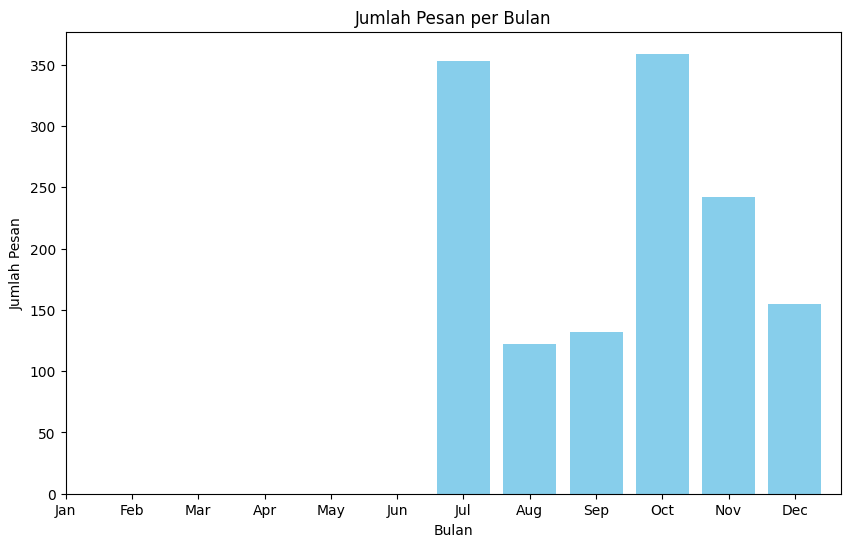

In [ ]:
df['Month'] = pd.to_numeric(df['Month'], errors='coerce')

# Hitung jumlah pesan per bulan
message_count_per_month = df.groupby('Month')['Message'].count()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(message_count_per_month.index, message_count_per_month.values, color='skyblue')
plt.title('Jumlah Pesan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesan')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#**Mengetahui berapa banyak pesan per-hari**

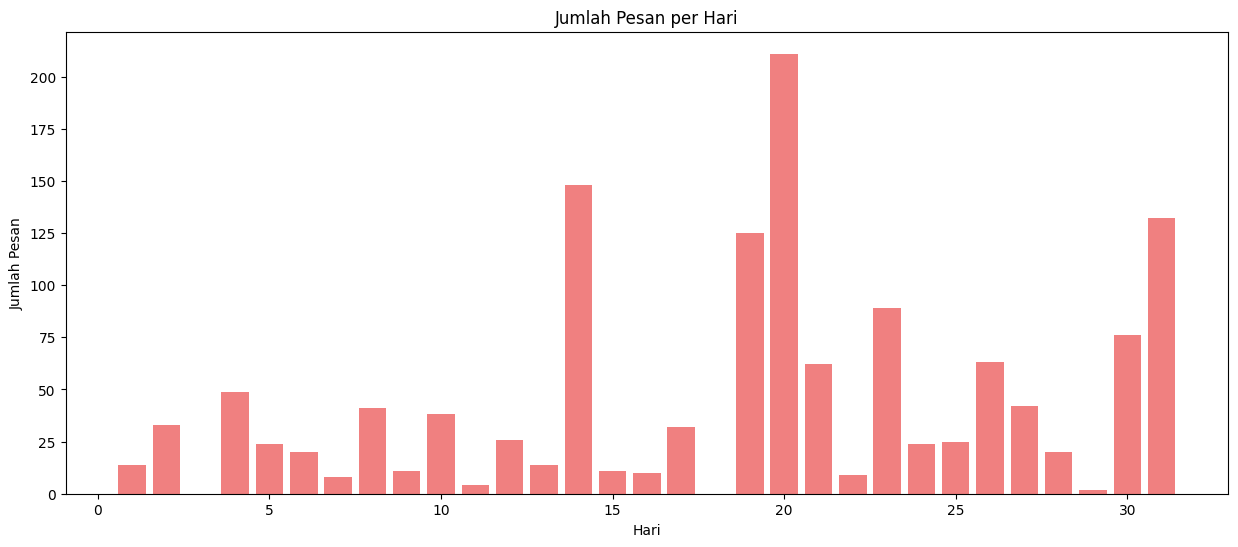

In [ ]:
# Ubah kolom 'Day' menjadi tipe data numerik
df['Day'] = pd.to_numeric(df['Day'], errors='coerce')

# Hitung jumlah pesan per hari
message_count_per_day = df.groupby('Day')['Message'].count()

# Plot
plt.figure(figsize=(15, 6))
plt.bar(message_count_per_day.index, message_count_per_day.values, color='lightcoral')
plt.title('Jumlah Pesan per Hari')
plt.xlabel('Hari')
plt.ylabel('Jumlah Pesan')
plt.show()

#**Preprocessing Text and Visual Representation**


In [ ]:
# Membuat fungsi untuk membersihkan tweet
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers

    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

In [ ]:
# Merubah teks menjadi huruf kecil semua
df['message_clean'] = df['Message'].apply(cleaningText)
df['message_clean'] = df['message_clean'].apply(casefoldingText)
df.head()

,Date,Time,Name,Message,Day,Month,Year,message_clean
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮,19,7,21,mual liatnya 🤮
1,19/07/21,19.33,Irma Octavia,Seriusss eee,19,7,21,seriusss eee
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh,19,7,21,geli wehhhhh
3,19/07/21,19.34,Irma Octavia,Awkwkwkw,19,7,21,awkwkwkw
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲,19,7,21,apalah 🥲


In [ ]:
# Bersihkan emoticon dulu

import re

def clean_emoticons(text):
    # Definisikan pola emoticon dengan regular expression
    emoticon_pattern = re.compile(
        r'[\U0001F600-\U0001F64F]|[\U0001F300-\U0001F5FF]|[\U0001F680-\U0001F6FF]|[\U0001F700-\U0001F77F]|[\U0001F780-\U0001F7FF]|[\U0001F800-\U0001F8FF]|[\U0001F900-\U0001F9FF]|[\U0001FA00-\U0001FA6F]|[\U0001FA70-\U0001FAFF]|[\U00002702-\U000027B0]|[\U000024C2-\U0001F251]',
        flags=re.UNICODE
    )

    # Ganti emoticon dengan string kosong
    cleaned_text = emoticon_pattern.sub('', text)

    return cleaned_text

# Contoh penggunaan pada kolom 'Message'
df['message_clean_2'] = df['message_clean'].apply(clean_emoticons)

In [ ]:
df

,Date,Time,Name,Message,Day,Month,Year,message_clean,message_clean_2
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮,19,7,21,mual liatnya 🤮,mual liatnya
1,19/07/21,19.33,Irma Octavia,Seriusss eee,19,7,21,seriusss eee,seriusss eee
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh,19,7,21,geli wehhhhh,geli wehhhhh
3,19/07/21,19.34,Irma Octavia,Awkwkwkw,19,7,21,awkwkwkw,awkwkwkw
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲,19,7,21,apalah 🥲,apalah
...,...,...,...,...,...,...,...,...,...
1358,27/12/21,21.43,Ali Tuasikal,Chat dri jaman purba baru nyadar 😭,27,12,21,chat dri jaman purba baru nyadar 😭,chat dri jaman purba baru nyadar
1359,27/12/21,21.43,Irma Octavia,Maapkeun,27,12,21,maapkeun,maapkeun
1360,27/12/21,22.25,Ali Tuasikal,"Btw lu desain apa ir, pake apk ini?",27,12,21,btw lu desain apa ir pake apk ini,btw lu desain apa ir pake apk ini
1361,27/12/21,22.25,Ali Tuasikal,<Media tidak disertakan>,27,12,21,media tidak disertakan,media tidak disertakan


Menggunakan stopwords sendiri untuk menghapus beberapa kata yang tidak begitu penting dengan memberikan variabel dengan nama stopwords.

In [ ]:
stopword=['gue','gw','user','gak','gk','yang','yg','lu','ya','si','jd','jadi','apa','ap','ama','iya','lbh',
         'jd','kalo','klo','tdk','tidak','nya','ny','tuh','sih','sdh','udah','udh','langsung','mah','bang',
         'url','loe','lo','deh','dh','tp','tapi','emg','emang','ah','aja','aj','ke','dah','eh','gimana',
         'jg','juga','jgn','g','ga','nih','ni','tu', 'banget','bgt','gk','harus','hrs','biar','gini','ttp',
         'dr','dari','dri','ente','tentang','ttg','sudah','di', 'amp','semua','kalau','tau','lg','karna',
         'mau','masih','msh','cuma','cm','sj','saja','dengan','dgn','dlu','dulu','dl','sok','karena','luh',
         'kan','it','itu','buat','tak','oleh','km','kamu','kmu','kali','kayak','bikin','bkn','loh','bener',
         'trus','terus','gua','dasar','kau','orang','liat','lihat','masuk','org','ulang','wkwkwk','gmnin',
         'dapat','dpt','pd','pada','x','isi','itu','it','kek','spt','suka','mending','jan','hauahahaha','o',
         'wes','sisan','gih','woy','woii','aje','rp','klw','mudah','ngapain','kek','skrg','sby','lbh','mrk',
         'ngak','bang','habishabisan','hp','sgala','segala','pake','pke','ttp','hti','elo','ta','wk','cari',
         'udik','haha','sampe','kl','ma','dsna','stlh','setelah','ajk','ajak', 'wkwkwk', 'kek', 'kok', 'eee',
          'awkwkwkw', 'nya', 'serta', 'ini', 'ni', 'jdi', 'ku', 'gtu', 'ada', 'aku', 'dia', 'atau', 'dan']

def clean_key(text):
    text=' '.join(word for word in text.split() if word not in stopword)
    return text
df['message_clean_3'] = df['message_clean_2'].apply(clean_key)
df.head()

,Date,Time,Name,Message,Day,Month,Year,message_clean,message_clean_2,message_clean_3,message_sekian
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮,19,7,21,mual liatnya 🤮,mual liatnya,mual liatnya,"[mual, liat]"
1,19/07/21,19.33,Irma Octavia,Seriusss eee,19,7,21,seriusss eee,seriusss eee,seriusss,[seriusss]
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh,19,7,21,geli wehhhhh,geli wehhhhh,geli wehhhhh,"[geli, wehhhhh]"
3,19/07/21,19.34,Irma Octavia,Awkwkwkw,19,7,21,awkwkwkw,awkwkwkw,,[]
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲,19,7,21,apalah 🥲,apalah,apalah,[apa]


##**Lanjut filtering & stemming**

In [ ]:
!pip install Sastrawi

In [ ]:
# Unduh resource stopwords untuk bahasa Indonesia
nltk.download('stopwords-indonesian')

[nltk_data] Error loading stopwords-indonesian: Package 'stopwords-
[nltk_data]     indonesian' not found in index


False

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

def filteringText(text):
    factory = StopWordRemoverFactory()
    stopword_remover = factory.create_stop_word_remover()

    # Menghapus stopwords menggunakan Sastrawi
    cleaned_text = stopword_remover.remove(text)

    # Mengembalikan teks yang telah dibersihkan ke dalam bentuk list
    return cleaned_text.split()



from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmingText(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Melakukan stemming pada teks
    stemmed_text = stemmer.stem(text)

    # Mengembalikan teks yang telah distem ke dalam bentuk list
    return stemmed_text.split()

In [ ]:
# Gunakan fungsi filteringText pada kolom 'Message'
df['message_sekian'] = df['message_clean_3'].apply(filteringText)
df['message_sekian'] = df['message_clean_3'].apply(stemmingText)

Membuat sebuah list kosong dengan mendeklarasikan kedalam bentuk string dan variabel diberi nama list_all (mencakup semua pesan) dan menampilkan kumpulan tweet dari kolom text_preprocessed

In [ ]:
df

,Date,Time,Name,Message,Day,Month,Year,message_clean,message_clean_2,message_clean_3,message_sekian
0,19/07/21,19.32,Ali Tuasikal,Mual liatnya 🤮,19,7,21,mual liatnya 🤮,mual liatnya,mual liatnya,"[mual, liat]"
1,19/07/21,19.33,Irma Octavia,Seriusss eee,19,7,21,seriusss eee,seriusss eee,seriusss,[seriusss]
2,19/07/21,19.34,Ali Tuasikal,Geli wehhhhh,19,7,21,geli wehhhhh,geli wehhhhh,geli wehhhhh,"[geli, wehhhhh]"
3,19/07/21,19.34,Irma Octavia,Awkwkwkw,19,7,21,awkwkwkw,awkwkwkw,,[]
4,19/07/21,20.07,Ali Tuasikal,Apalah 🥲,19,7,21,apalah 🥲,apalah,apalah,[apa]
...,...,...,...,...,...,...,...,...,...,...,...
1358,27/12/21,21.43,Ali Tuasikal,Chat dri jaman purba baru nyadar 😭,27,12,21,chat dri jaman purba baru nyadar 😭,chat dri jaman purba baru nyadar,chat jaman purba baru nyadar,"[chat, jaman, purba, baru, nyadar]"
1359,27/12/21,21.43,Irma Octavia,Maapkeun,27,12,21,maapkeun,maapkeun,maapkeun,[maapkeun]
1360,27/12/21,22.25,Ali Tuasikal,"Btw lu desain apa ir, pake apk ini?",27,12,21,btw lu desain apa ir pake apk ini,btw lu desain apa ir pake apk ini,btw desain ir apk ini,"[btw, desain, ir, apk, ini]"
1361,27/12/21,22.25,Ali Tuasikal,<Media tidak disertakan>,27,12,21,media tidak disertakan,media tidak disertakan,media disertakan,"[media, serta]"


In [ ]:
list_all = ''
for i in df['message_sekian']:
    for j in i :
        list_all += ' '+(j)

In [ ]:
list_all

' mual liat seriusss geli wehhhhh apa cuek canda ituu beb cuek aku ini cuek uluhh uluhh oiyaaa aku mauu izinnn sama kamuu boleh izin pinjem nama kamuu heh aksi tipu sayang nggaaaaa bukann akuu nulis ceritaaa jdi aku bingung nama tokoh slh nama ohhhh boleh dong asal jangan santet nnt cerita cerita santet nggaa dongg apalahh ush ku santet bisa ku nyaman awkwkwk pelet eehh enak ajaaa santet celaka korban aku celaka engga lho astaghfirullah maksud gtu kesel muluuu nampaknyaa media serta wihhh mauuuu dongg bantu masakk apaa gaa atau bantu makan doang makan lahhhhhhhhhhhhhh aku bantu masak hanya mitos sudahh kuu dugaaa rusuhin maalahhh sebenernya masak gtu kecil mager eaaakk kamuu esok ati sayang keluar kenapa tuhh aku masakin bisa cobaa pikirr an serius aku ahh seriuss hmm simple ajaa akuu sukaa pecel salah sembeleeh ntarr skipp makan knp heee ada mantan ku sembelih mantan makan jaman maaf lidah ku bisa makan makan gtu mohon maaf songong bet anjir media serta sembeleehkan mantan kuu urus mu

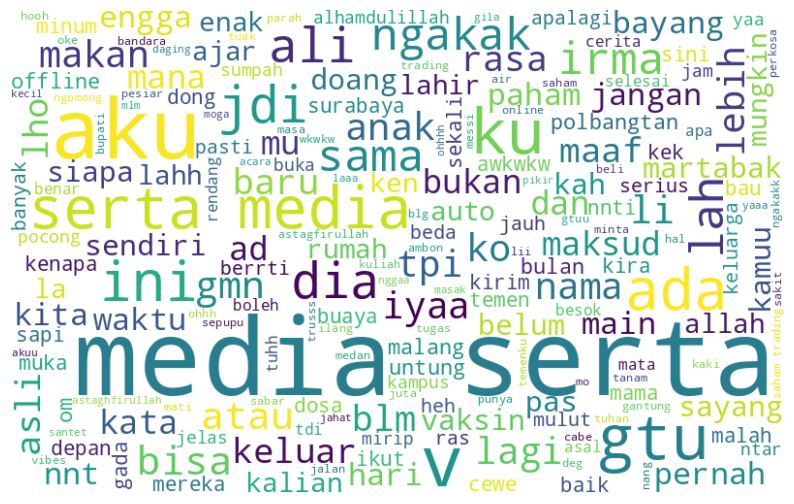

In [ ]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(list_all)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

<Axes: ylabel='0'>

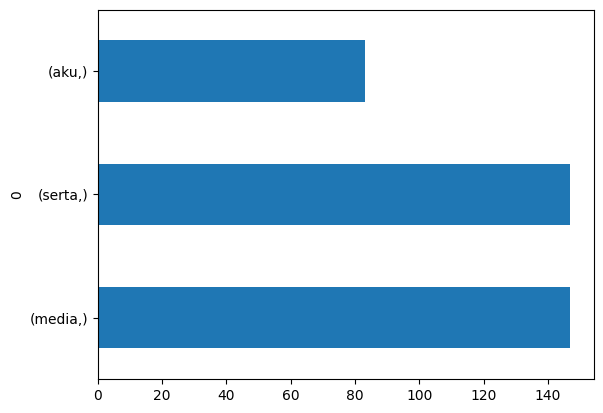

In [ ]:
list_message= []
for i in df['message_sekian']:
    for j in i:
        list_message.append(j)
list_message = pd.DataFrame(list_message)
list_message.value_counts().nlargest(3).plot(kind='barh')

#**Siapa yang suka spam chat?**

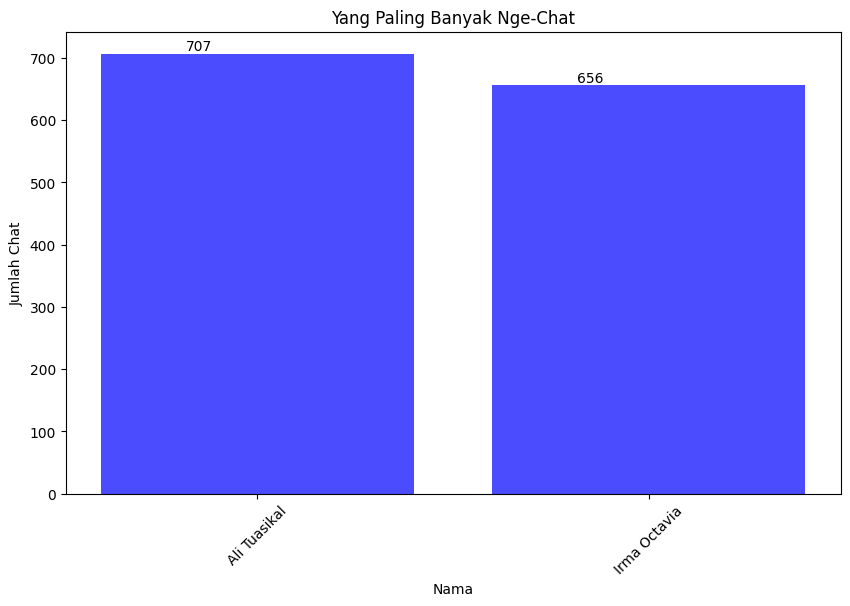

In [ ]:
chat = df.groupby('Name')['Message'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(chat.index, chat.values, color='blue', alpha=0.7)
plt.title('Yang Paling Banyak Nge-Chat')
plt.xlabel('Nama')
plt.ylabel('Jumlah Chat')
plt.xticks(rotation=45)

# Menambahkan label pada setiap bar
for bar, label in zip(bars, chat.values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.1, round(label, 2), ha='center', va='bottom')

plt.show()

#**Banyaknya pesan per-jam**

Text(0, 0.5, 'Jumlah Pesan')

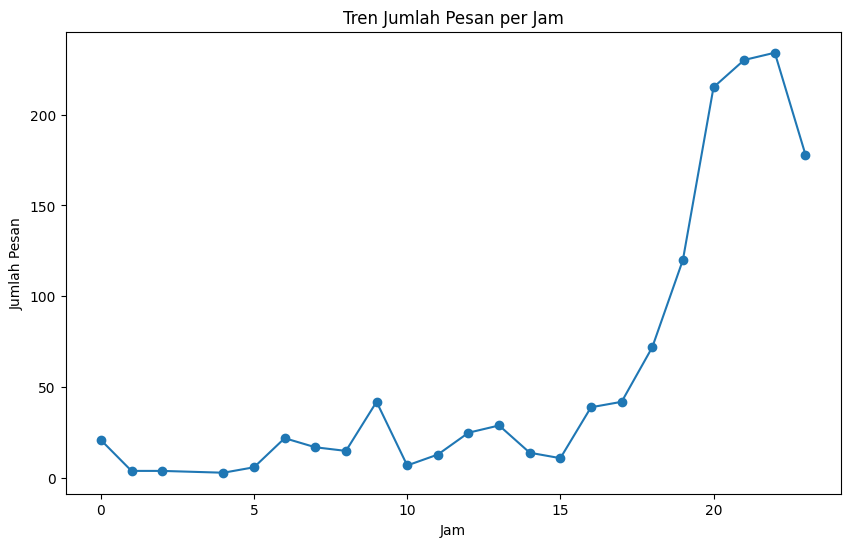

In [ ]:
# Konversi kolom 'time' menjadi tipe data datetime
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M')

# Ekstrak jam dari kolom 'time'
df['Hour'] = df['Time'].dt.hour

# Hitung jumlah pesan berdasarkan jam
hourly_counts = df.groupby('Hour')['Message'].count()

# Membuat plot tren
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts.values, marker='o')
plt.title('Tren Jumlah Pesan per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pesan')

Faktanya, doi dapat cepat membalas pesan diatas jam 8 malam. Dikarenakan pula faktor mahasiswa baru yang masih tidak diperbolehkan untuk memegang hp/ponsel selama masa awal di asrama POLBANGTAN MALANG.

#**Membuat Model NLP**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

In [ ]:
# Data yang digunakan
data = df[['Date', 'Name', 'message_clean_3']]
data

,Date,Name,message_clean_3
0,19/07/21,Ali Tuasikal,mual liatnya
1,19/07/21,Irma Octavia,seriusss
2,19/07/21,Ali Tuasikal,geli wehhhhh
3,19/07/21,Irma Octavia,
4,19/07/21,Ali Tuasikal,apalah
...,...,...,...
1358,27/12/21,Ali Tuasikal,chat jaman purba baru nyadar
1359,27/12/21,Irma Octavia,maapkeun
1360,27/12/21,Ali Tuasikal,btw desain ir apk
1361,27/12/21,Ali Tuasikal,media disertakan


In [ ]:
# Merubah menjadi binner
data.Name[data.Name == 'Ali Tuasikal'] = 0
data.Name[data.Name == 'Irma Octavia'] = 1

<ipython-input-84-3706afd53ebc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Name[data.Name == 'Ali Tuasikal'] = 0
<ipython-input-84-3706afd53ebc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.Name[data.Name == 'Irma Octavia'] = 1


In [ ]:
data

,Date,Name,message_clean_3
0,19/07/21,0,mual liatnya
1,19/07/21,1,seriusss
2,19/07/21,0,geli wehhhhh
3,19/07/21,1,
4,19/07/21,0,apalah
...,...,...,...
1358,27/12/21,0,chat jaman purba baru nyadar
1359,27/12/21,1,maapkeun
1360,27/12/21,0,btw desain ir apk
1361,27/12/21,0,media disertakan


In [ ]:
# Merubah data kedalam bentuk numpy array
chat = data['message_clean_3'].values
label = data[['Name']].values

In [ ]:
# Membagi data training dan testing
chat_latih, chat_test, label_latih, label_test = train_test_split(chat, label, test_size=0.2)

Kemudian setiap kata pada datasetdiubah  ke dalam bilangan numerik dengan fungsi Tokenizer. Setelah tokenisasi selesai, saya perlu membuat mengonversi setiap sampel menjadi sequence.

In [ ]:
tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(chat_latih)
tokenizer.fit_on_texts(chat_test)

sekuens_latih = tokenizer.texts_to_sequences(chat_latih)
sekuens_test = tokenizer.texts_to_sequences(chat_test)


MAX_SEQUENCE_LENGTH = max(len(seq) for seq in sekuens_latih + sekuens_test)
padded_latih = pad_sequences(sekuens_latih, maxlen=MAX_SEQUENCE_LENGTH)
padded_test = pad_sequences(sekuens_test, maxlen=MAX_SEQUENCE_LENGTH)

Untuk arsitektur model menggunakan layer Embedding dengan dimensi embedding sebesar 16, serta dimensi dari input sebesar nilai num_words pada objek tokenizer.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16, input_length=MAX_SEQUENCE_LENGTH),
    tf.keras.layers.LSTM(6, dropout=0.2, recurrent_dropout=0.2),  # Menambahkan dropout
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid') # pakai sigmoid karena bukan multi-class, bernilai 1 = 1 label
])

Menggunakan fungsi compile dan tentukan optimizer serta loss function yang akan dipakai oleh model.

In [ ]:
# Menggunakan optimizer Adam dengan learning rate yang lebih rendah
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

In [ ]:
# Gunakan fungsi callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
padded_latih = np.array(padded_latih, dtype=np.float32)
label_latih = np.array(label_latih, dtype=np.float32)
padded_test = np.array(padded_test, dtype=np.float32)
label_test = np.array(label_test, dtype=np.float32)

In [ ]:
history = model.fit(x=padded_latih, y=label_latih, epochs=100,
                    validation_data=(padded_test, label_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
35/35 - 1s - loss: 0.2660 - accuracy: 0.8908 - val_loss: 0.5565 - val_accuracy: 0.7289 - 831ms/epoch - 24ms/step
Epoch 2/100
35/35 - 1s - loss: 0.2838 - accuracy: 0.8725 - val_loss: 0.5556 - val_accuracy: 0.7253 - 1s/epoch - 30ms/step
Epoch 3/100
35/35 - 1s - loss: 0.2777 - accuracy: 0.8752 - val_loss: 0.5532 - val_accuracy: 0.7253 - 1s/epoch - 30ms/step
Epoch 4/100
35/35 - 1s - loss: 0.2790 - accuracy: 0.8844 - val_loss: 0.5576 - val_accuracy: 0.7253 - 1s/epoch - 31ms/step
Epoch 5/100
35/35 - 1s - loss: 0.2730 - accuracy: 0.8706 - val_loss: 0.5582 - val_accuracy: 0.7253 - 689ms/epoch - 20ms/step
Epoch 6/100
35/35 - 1s - loss: 0.2678 - accuracy: 0.8890 - val_loss: 0.5562 - val_accuracy: 0.7253 - 641ms/epoch - 18ms/step
Epoch 7/100
35/35 - 1s - loss: 0.2583 - accuracy: 0.8872 - val_loss: 0.5590 - val_accuracy: 0.7253 - 627ms/epoch - 18ms/step
Epoch 8/100
35/35 - 1s - loss: 0.2680 - accuracy: 0.8817 - val_loss: 0.5569 - val_accuracy: 0.7216 - 622ms/epoch - 18ms/step
Epoch 9/1

Membentuk plot loss dan akurasi

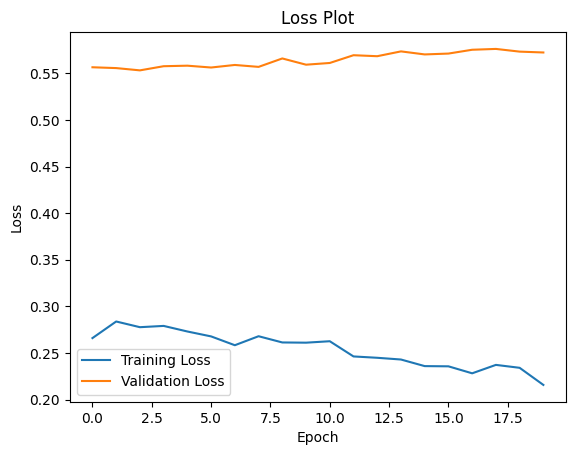

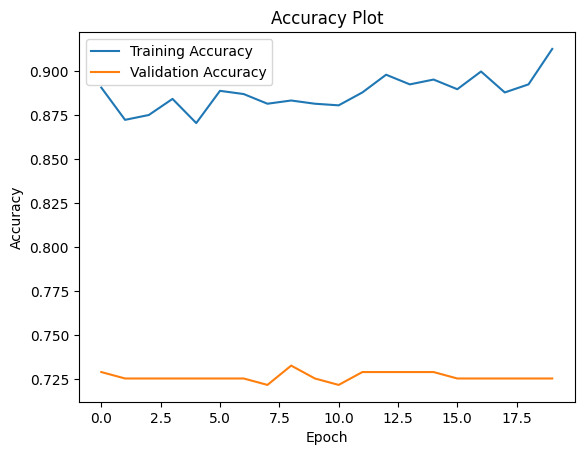

In [ ]:
# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Plot')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Akurasi
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Plot')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()